In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

In [7]:
house_test2 = pd.read_csv('https://raw.githubusercontent.com/haram4th/ADsP/main/house_test.csv')

In [8]:
house_test2

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [9]:
house_train1 = pd.read_csv('https://raw.githubusercontent.com/haram4th/ADsP/main/house_train.csv')

In [10]:
house_train1

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


종속변수: 'SalePrice'

딥러닝은 결측값 처리해주고, 카테고리변수만 - get.dummies 로 원핫인코딩 시켜주고 돌리면 돼.

In [44]:
house_train1['LotFrontage'] = house_train1['LotFrontage'].fillna(house_train1['LotFrontage'].mean())
#data['Age'].fillna(data['Age'].mean()) 

In [47]:
house_test2['LotFrontage'] = house_test2['LotFrontage'].fillna(house_test2['LotFrontage'].mean())

In [48]:
house_train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [55]:
house_train1.drop(['Alley','PoolQC', 'Fence', 'MiscFeature', 'FireplaceQu'], axis=1, inplace=True)

In [56]:
house_test2.drop(['Alley','PoolQC', 'Fence', 'MiscFeature', 'FireplaceQu'], axis=1, inplace=True)

In [57]:
house_test2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1457 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

In [89]:
house_train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [86]:
house_train1['BsmtQual'].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [85]:
house_train1['BsmtQual'].median()

TypeError: could not convert string to float: 'Gd'

In [87]:
house_train1['BsmtQual'] = house_train1['BsmtQual'].fillna('TA')

In [70]:
from ydata_profiling import ProfileReport
profile = ProfileReport(house_train1, title="Profile Report")
profile.to_file("house_train1.html")

Export report to file: 100%|█████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.29it/s]


In [93]:
data1 = house_train1.drop(['BsmtCond','BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType', 'GarageYrBlt', 'GarageFinish','GarageQual','GarageCond'], axis=1)

KeyError: "['BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond'] not found in axis"

In [ ]:
house_train1.drop(['BsmtCond','BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType', 'GarageYrBlt', 'GarageFinish','GarageQual','GarageCond'], axis=1)

In [138]:
data1.isna().sum.sort_values(ascending=False)

AttributeError: 'function' object has no attribute 'sort_values'

In [97]:
data1 = house_train1

In [99]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 66 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [96]:
data2 = house_test2.drop(['BsmtCond','BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType', 'GarageYrBlt', 'GarageFinish','GarageQual','GarageCond'], axis=1)

In [110]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 66 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [116]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 53 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   object 
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1459 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

In [114]:
data2 = data2.drop(['SaleType', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional'], axis=1)

In [115]:
data1 = data1.drop(['SaleType', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional'], axis=1)

In [119]:
data2['GarageArea'].value_counts()

0.0       76
576.0     50
440.0     47
484.0     34
400.0     33
          ..
453.0      1
1348.0     1
567.0      1
811.0      1
682.0      1
Name: GarageArea, Length: 459, dtype: int64

In [ ]:
house_train1['BsmtQual'].median()

In [120]:
data2['GarageArea'] = data2['GarageArea'].fillna(0.0)

In [121]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 54 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [122]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 53 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   object 
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1459 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

In [125]:
data1 = pd.get_dummies(data1, drop_first=True)

In [126]:
data2 = pd.get_dummies(data2, drop_first=True)

In [128]:
data1.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,PavedDrive_P,PavedDrive_Y,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,856,854,0,1710,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,2008,208500,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,1262,0,0,1262,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5,2007,181500,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,920,866,0,1786,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,9,2008,223500,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,961,756,0,1717,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,2,2006,140000,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,

In [139]:
X = data1.drop('SalePrice', axis=1)
y = data1['SalePrice']

In [141]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=7)

In [142]:
X.shape

(1460, 167)

In [152]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# 학습 자동 중단
from tensorflow.keras.callbacks import EarlyStopping
#학습중 loss가 거의 변하지 않을 때 모델 저장
from tensorflow.keras.callbacks import ModelCheckpoint

In [150]:
model = Sequential()
model.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(1)) # 연속형이면 여기가 달라!
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                1680      
                                                                 
 dense_9 (Dense)             (None, 30)                330       
                                                                 
 dense_10 (Dense)            (None, 40)                1240      
                                                                 
 dense_11 (Dense)            (None, 1)                 41        
                                                                 
Total params: 3,291
Trainable params: 3,291
Non-trainable params: 0
_________________________________________________________________


In [165]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=20)
modelpath = "./model/house_model.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=0, save_best_only=True)

history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_valid, y_valid), verbose=1,
                   callbacks=[early_stopping_callback, checkpointer])

pred = model.predict(X_valid)

Epoch 1/200
37/37 [==============================] - 1s 7ms/step - loss: 1693788544.0000 - mse: 1693788544.0000 - val_loss: 1677652096.0000 - val_mse: 1677652096.0000
Epoch 2/200
37/37 [==============================] - 0s 2ms/step - loss: 1674595840.0000 - mse: 1674595840.0000 - val_loss: 1788215680.0000 - val_mse: 1788215680.0000
Epoch 3/200
37/37 [==============================] - 0s 2ms/step - loss: 1682124672.0000 - mse: 1682124672.0000 - val_loss: 1746164352.0000 - val_mse: 1746164352.0000
Epoch 4/200
37/37 [==============================] - 0s 3ms/step - loss: 1664597120.0000 - mse: 1664597120.0000 - val_loss: 1665637120.0000 - val_mse: 1665637120.0000
Epoch 5/200
37/37 [==============================] - 0s 2ms/step - loss: 1662170624.0000 - mse: 1662170624.0000 - val_loss: 1741088256.0000 - val_mse: 1741088256.0000
Epoch 6/200
37/37 [==============================] - 0s 2ms/step - loss: 1673450752.0000 - mse: 1673450752.0000 - val_loss: 1696564992.0000 - val_mse: 1696564992.000

Epoch 50/200
37/37 [==============================] - 0s 2ms/step - loss: 1587528704.0000 - mse: 1587528704.0000 - val_loss: 1760777088.0000 - val_mse: 1760777088.0000
Epoch 51/200
37/37 [==============================] - 0s 2ms/step - loss: 1605483648.0000 - mse: 1605483648.0000 - val_loss: 1681570432.0000 - val_mse: 1681570432.0000
Epoch 52/200
37/37 [==============================] - 0s 2ms/step - loss: 1578491392.0000 - mse: 1578491392.0000 - val_loss: 1624573056.0000 - val_mse: 1624573056.0000
Epoch 53/200
37/37 [==============================] - 0s 2ms/step - loss: 1579970816.0000 - mse: 1579970816.0000 - val_loss: 1747155712.0000 - val_mse: 1747155712.0000
Epoch 54/200
37/37 [==============================] - 0s 2ms/step - loss: 1567432448.0000 - mse: 1567432448.0000 - val_loss: 1626106240.0000 - val_mse: 1626106240.0000
Epoch 55/200
37/37 [==============================] - 0s 2ms/step - loss: 1563732352.0000 - mse: 1563732352.0000 - val_loss: 1669412864.0000 - val_mse: 16694128

In [158]:
pred.shape # 처음엔 2차원으로 나옴.

(292,)

In [159]:
y_valid.shape

(292,)

In [166]:
pred = pred.flatten() # 2차원에서 1차원으로 펴지게 하기

In [160]:
pred.ndim # 1차원으로 바뀜.

1

In [167]:
pred

array([162965.72 , 221177.11 , 183536.84 , 138415.69 , 140147.84 ,
       290342.53 , 156655.94 , 104112.414, 178552.34 , 111954.87 ,
       227622.95 , 165656.27 , 118996.96 , 167340.5  , 186075.84 ,
       186257.12 , 209180.62 , 180386.45 , 149909.61 , 124965.34 ,
       181708.47 , 137358.94 , 122621.99 , 257959.25 , 302551.34 ,
       191657.61 ,  98541.625, 161456.84 , 253673.62 , 119793.83 ,
       182107.84 , 244876.06 , 262798.28 , 221493.62 , 184369.97 ,
       296195.47 , 163556.28 , 161217.4  , 265561.66 , 211412.81 ,
       113813.086, 173208.44 , 162719.44 , 232925.94 , 203286.12 ,
       205050.44 , 166854.84 , 191023.1  , 336642.66 , 201720.4  ,
       181585.25 , 169474.7  , 153041.97 , 210086.9  , 102990.89 ,
       106506.48 , 262104.02 , 166582.31 , 217260.98 , 205065.28 ,
       173588.9  , 266705.   , 174001.66 , 129941.02 , 150478.64 ,
       161170.22 , 116116.414, 177685.69 , 133086.08 , 196709.1  ,
       217907.69 , 171490.88 , 126741.875, 141932.38 , 322504.

In [169]:
real = np.array(y_valid)

In [170]:
real

array([152000, 189000, 172785,  60000, 123000, 318000, 142500, 124000,
       137000, 129500, 246578, 177500, 109500, 155835, 190000, 178000,
       190000, 152000, 140000, 170000, 183000, 148000, 128000, 260000,
       313000, 106000, 105000, 180000, 212900, 115000, 162900, 196000,
       316600, 255000, 173000, 239000, 134900, 147000, 270000, 200000,
       105500, 173000, 155000, 160000, 324000, 215000, 202500, 167000,
       242000, 214000, 275000, 166000, 156932, 192500, 118000, 124000,
       277000, 146500, 206900, 192000, 144500, 228500, 140000, 131000,
        90000, 181134, 128000, 172400, 147000, 162000, 221000, 154000,
        97000, 125000, 475000, 320000, 165000, 108000, 140000,  98000,
       145000, 423000, 185000, 394432, 345000, 130250, 119000, 135000,
       385000,  93500, 367294, 124000, 485000, 171000, 116500, 185000,
       222000, 127500, 140000, 129000, 143900, 138800, 279500, 193879,
       129000, 224500, 133000, 277500, 205000, 137000,  83000,  88000,
      

In [172]:
result = pd.DataFrame({"real": real, "pred":pred})

In [173]:
result

,real,pred
0,152000,162965.718750
1,189000,221177.109375
2,172785,183536.843750
3,60000,138415.687500
4,123000,140147.843750
...,...,...
287,151500,47032.375000
288,134500,125569.460938
289,165500,154930.171875
290,132000,156071.921875


<AxesSubplot:>

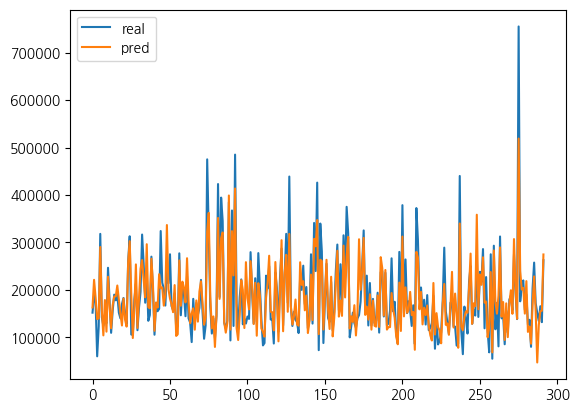

In [176]:
result.plot()

<AxesSubplot:>

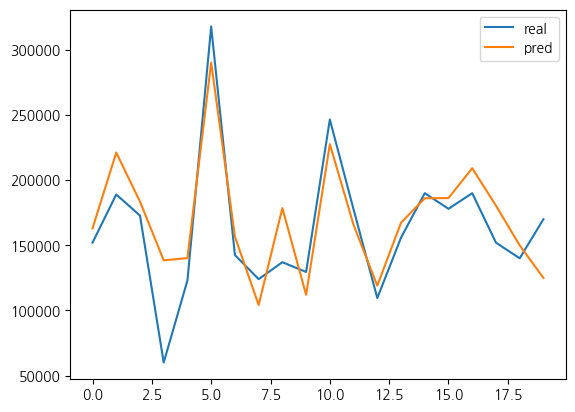

In [177]:
result[:20].plot()

* 그래프를 보면 실제값과 얼추 맞게 예측하고 있구나 알 수 있음.